In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\a\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the data

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

## Looking at the data features

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## Rename columns PE8

In [6]:
customer_df.columns = [e.lower().replace(' ', '_') for e in customer_df.columns]
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### Change 'date' column to datetime format

In [23]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

### Task: Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [8]:
numericals = customer_df.select_dtypes(include = np.number)
display(numericals.nunique())cu

display(numericals.nunique()/len(numericals))

SyntaxError: invalid syntax (2211826936.py, line 2)

In [ ]:
# We assume that everything, that has more than 20 different values is continous data.
discrete_cols = []
conti_cols = []
def iscontinous(column):
    if len(numericals[column].unique()) > 20:
        conti_cols.append(column)
    else:
        discrete_cols.append(column)

In [ ]:
for col in numericals.columns:
    iscontinous(col)

In [ ]:
cont_data = numericals[conti_cols]
cont_data.shape

In [ ]:
discrete_data = numericals[discrete_cols]
discrete_data.columns

In [ ]:
categoricals = customer_df.select_dtypes(include = object)
categoricals_disc = pd.concat([categoricals, discrete_data], axis=1)

categoricals_disc.drop('customer', axis=1, inplace=True)
categoricals_disc

### Plot a correlation matrix, comment what you see.

In [ ]:
correlations_matrix = cont_data.corr()

plt.figure(figsize = (8,6))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

There are a few comment-worthy, higher correlations. It makes sence that the total claim amount would positively correlate with the monthly premium auto variables, since premium autos would reclaim a higher amount. Customer lifetime value also correlates positively with the variable customer lifetime value.

### Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [ ]:
def disc_plots():
    for column in categoricals_disc.columns:
        sns.countplot(x=column, data=categoricals_disc)
        plt.show()

In [ ]:
categoricals_disc.apply(disc_plots())

In [ ]:
def cont_plots():
    for column in cont_data.columns:
        sns.displot(x=column, data=cont_data)
        plt.show()

In [ ]:
cont_data.apply(cont_plots())

Customer lifetime value: heavily right-scewed with some outliers in the higher range but most values going up to around 30.000.

Income: Lots of outliers at 0 which, due to the high count, should be dealt with without dropping. E.g. imputing with the mean.

Monthly premium auto: Most values lay around 60-150 but with few higher values going up to 300. Right-skewed.

Months since last claim: The counts have a tendency to go down towards 35 months. 

Months since policy inception: Quite evenly distributed over most values. 

Total claim amount: Right-skewed with a high peak around the claim amount of 400-500. 

### Outliers in continuous data

In [ ]:
for column in cont_data.columns:
    sns.boxplot(x=column, data=cont_data)
    plt.show()

Outliers are clearly viewable in 'customer lifetime value', 'monthly premium auto' and 'total claim amount'. 
Since high values in these variables still hold important information for the company (it wants to avoid high claim amounts), I would most likely log-transform these variables as not to completely loose information about these "want-to-avoid"-cases.

#### Checking for NaN

In [ ]:
customer_df.isna().sum()

No NaN values, so nothing needs to be done - nice.

# LAB: Feature Extraction

In [39]:
times = pd.DataFrame(customer_df['effective_to_date'].value_counts())
times

,effective_to_date
2011-01-10,195
2011-01-27,194
2011-02-14,186
2011-01-26,181
2011-01-17,180
2011-01-19,179
2011-01-31,178
2011-01-03,178
2011-01-20,173
2011-02-26,169


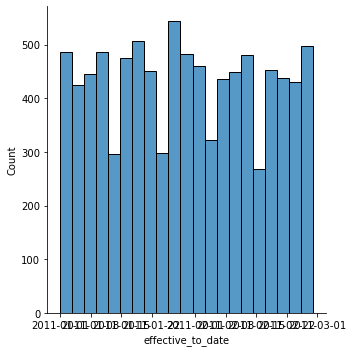

In [40]:
sns.displot(x='effective_to_date', data=customer_df)
plt.show()

<AxesSubplot:xlabel='effective_to_date,effective_to_date'>

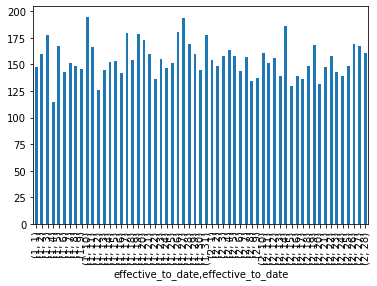

In [45]:
customer_df['effective_to_date'].groupby([customer_df['effective_to_date'].dt.month, customer_df['effective_to_date'].dt.day]).count().plot(kind="bar")